In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [110]:
df = pd.read_excel('/content/Dry_Bean_Dataset.xlsx')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [112]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

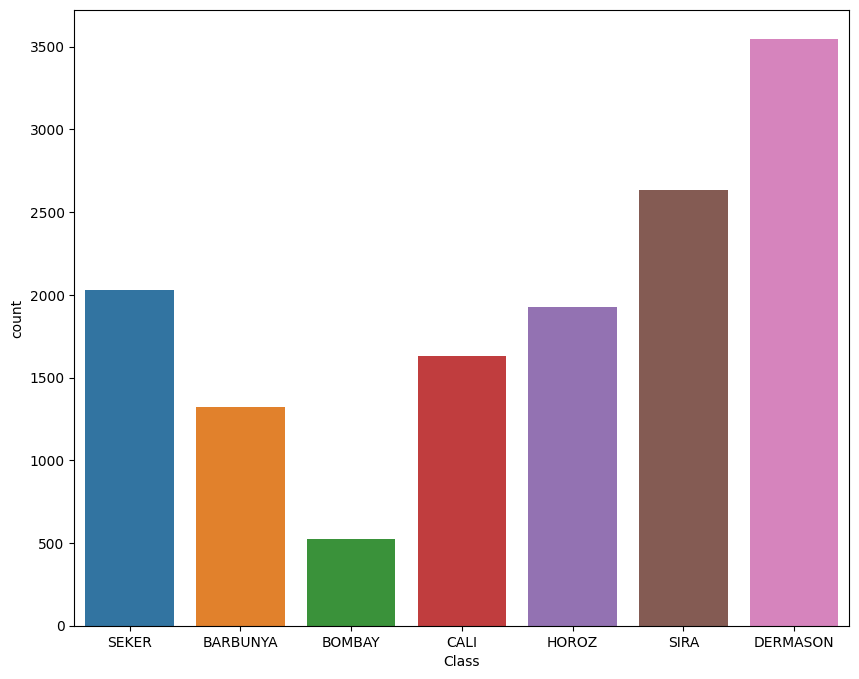

In [113]:
plt.figure(figsize=(10,8))
sns.countplot(x='Class' , data=df)
plt.show()

<ipython-input-114-564aa104e87e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


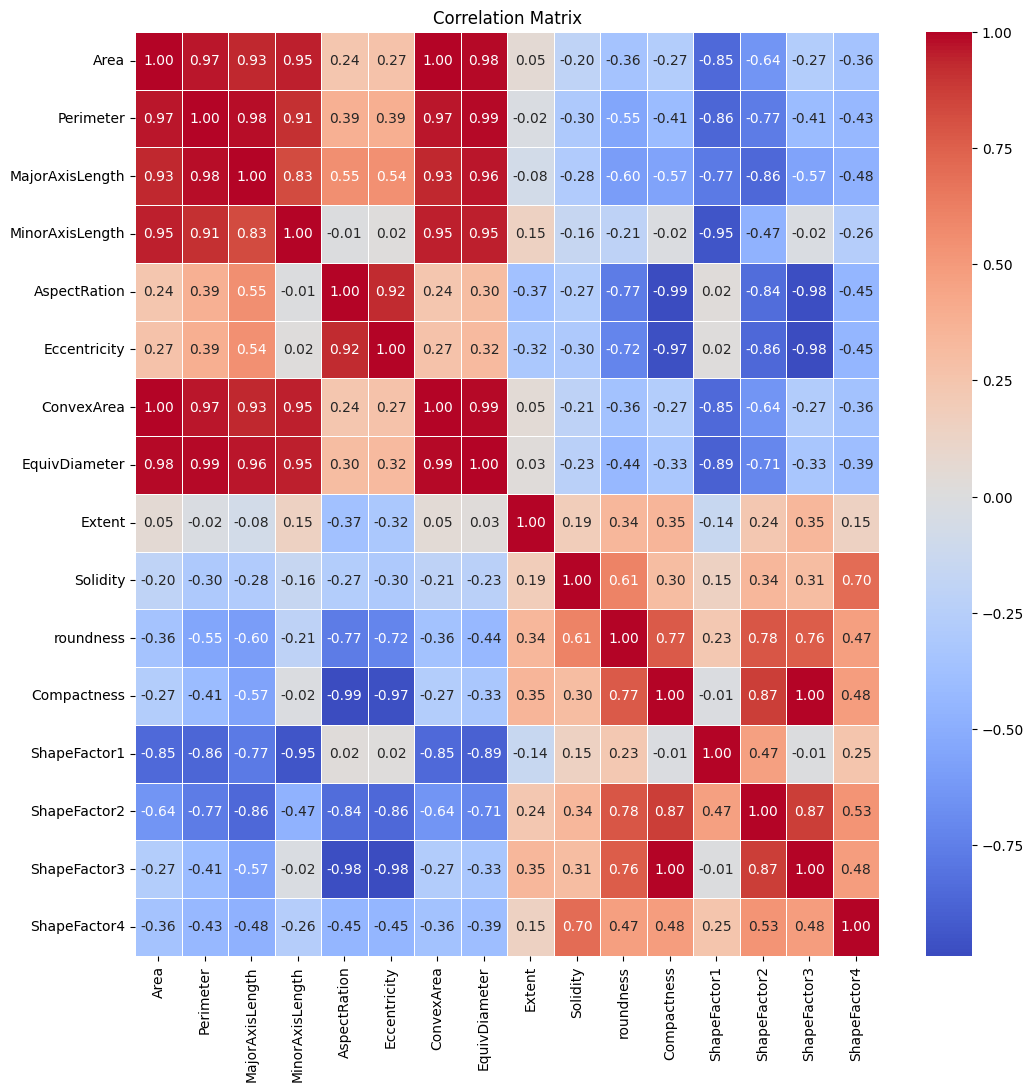

In [114]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [115]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


In [118]:
df.iloc[:,:-1]

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [119]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:,:-1])
scaled_data

array([[-0.84074853, -1.1433189 , -1.30659814, ...,  2.40217287,
         1.92572347,  0.83837103],
       [-0.82918764, -1.01392388, -1.39591111, ...,  3.10089314,
         2.68970162,  0.77113842],
       [-0.80715717, -1.07882906, -1.25235661, ...,  2.23509147,
         1.84135576,  0.91675514],
       ...,
       [-0.37203825, -0.44783294, -0.45047814, ...,  0.28920441,
         0.33632829,  0.39025114],
       [-0.37176543, -0.42702856, -0.42897404, ...,  0.22837538,
         0.2489734 ,  0.03644001],
       [-0.37135619, -0.38755718, -0.2917356 , ..., -0.12777587,
        -0.2764814 ,  0.71371948]])

In [120]:
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

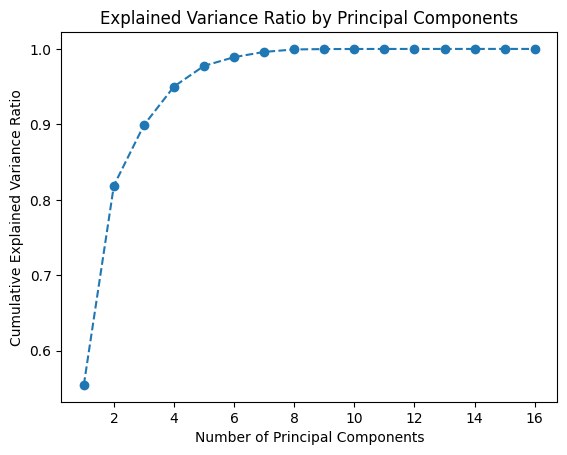

In [121]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

In [123]:
pca = PCA(n_components=8)
principal_components = pca.fit_transform(scaled_data)
principal_components

array([[-4.98156099,  1.82469731,  0.74902104, ...,  0.30121225,
         0.61026865, -0.27480202],
       [-5.43679225,  2.9323648 ,  2.18237398, ...,  0.04557491,
         1.69134198, -0.31765362],
       [-4.7580883 ,  1.82688385,  0.5140376 , ...,  0.2085379 ,
         0.59956313, -0.16209032],
       ...,
       [-1.41751472,  0.1411937 , -0.38720635, ..., -0.13733302,
        -0.3333777 ,  0.03788353],
       [-1.11466584, -0.21267932,  0.14408831, ..., -0.09716026,
        -0.3586018 ,  0.03483897],
       [-0.76643686, -0.64651411, -0.99412157, ...,  0.05216271,
        -0.2958651 , -0.04708744]])

In [125]:
label_encoder = LabelEncoder()
df['class_encoded'] = label_encoder.fit_transform(df['Class'])

In [126]:
output_target = df['class_encoded']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(principal_components, output_target, test_size=0.3, random_state=42)

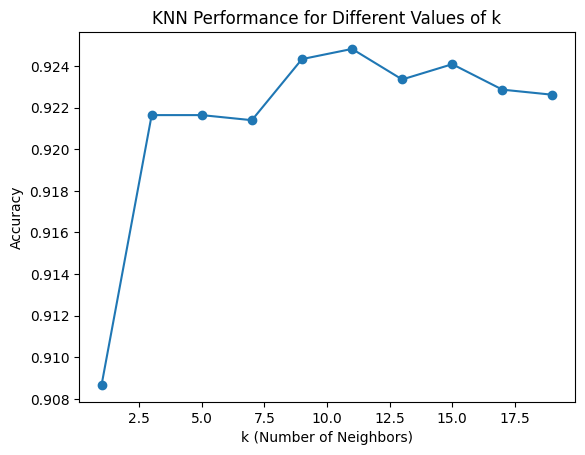

In [128]:
from sklearn import metrics
k_values = np.arange(1, 21, 2)
accuracy_values = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
plt.plot(k_values, accuracy_values, marker='o')
plt.title('KNN Performance for Different Values of k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.show()

In [129]:
model_1 = KNeighborsClassifier(n_neighbors=11)
model_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

Accuracy: 0.9248
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       395
           1       1.00      1.00      1.00       161
           2       0.93      0.95      0.94       479
           3       0.91      0.91      0.91      1043
           4       0.97      0.95      0.96       588
           5       0.95      0.95      0.95       619
           6       0.86      0.88      0.87       799

    accuracy                           0.92      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.92      0.92      4084



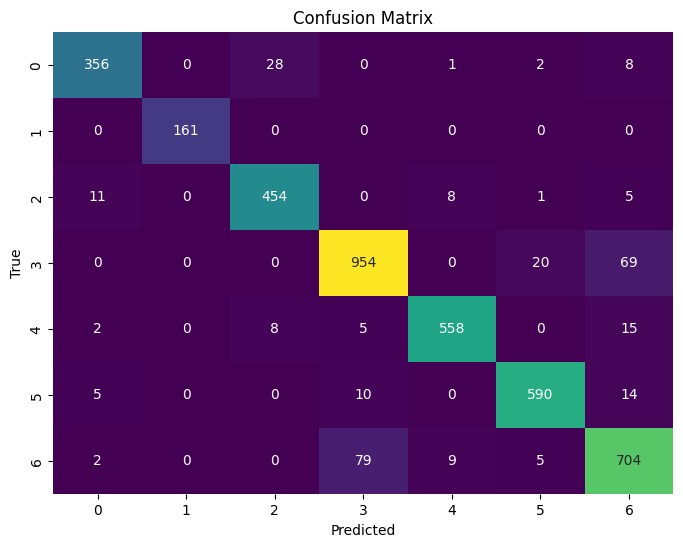

In [130]:
predictions_1 = model_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, predictions_1)
print(f"Accuracy: {accuracy_1:.4f}")
print("Classification Report:\n", classification_report(y_test, predictions_1))
cm1 = confusion_matrix(y_test, predictions_1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="viridis", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [135]:
model_2= GaussianNB()
model_2.fit(X_train, y_train)

GaussianNB()

Naive Bayes Accuracy: 0.8984
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       395
           1       1.00      1.00      1.00       161
           2       0.92      0.92      0.92       479
           3       0.93      0.83      0.88      1043
           4       0.94      0.96      0.95       588
           5       0.97      0.91      0.94       619
           6       0.76      0.91      0.83       799

    accuracy                           0.90      4084
   macro avg       0.92      0.92      0.92      4084
weighted avg       0.91      0.90      0.90      4084



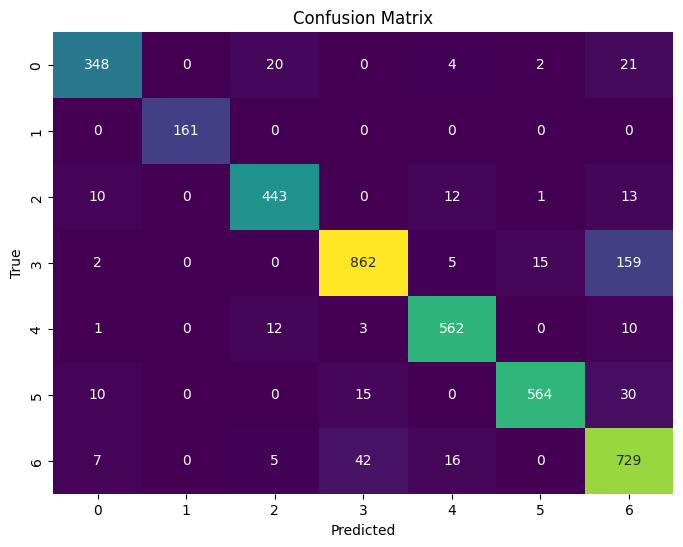

In [142]:
predictions_2 = model_2.predict(X_test)
accuracy_2 = accuracy_score(y_test, predictions_2)
print(f"Naive Bayes Accuracy: {accuracy_2:.4f}")
print("Naive Bayes Classification Report:\n", classification_report(y_test, predictions_2))
cm2 = confusion_matrix(y_test, predictions_2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt="d", cmap="viridis", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [140]:
model_3 = RandomForestClassifier(random_state=0)
model_3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Random Forest Accuracy: 0.9246
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       395
           1       1.00      1.00      1.00       161
           2       0.91      0.95      0.93       479
           3       0.92      0.91      0.92      1043
           4       0.97      0.96      0.96       588
           5       0.95      0.94      0.95       619
           6       0.87      0.89      0.88       799

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.94      4084
weighted avg       0.93      0.92      0.92      4084



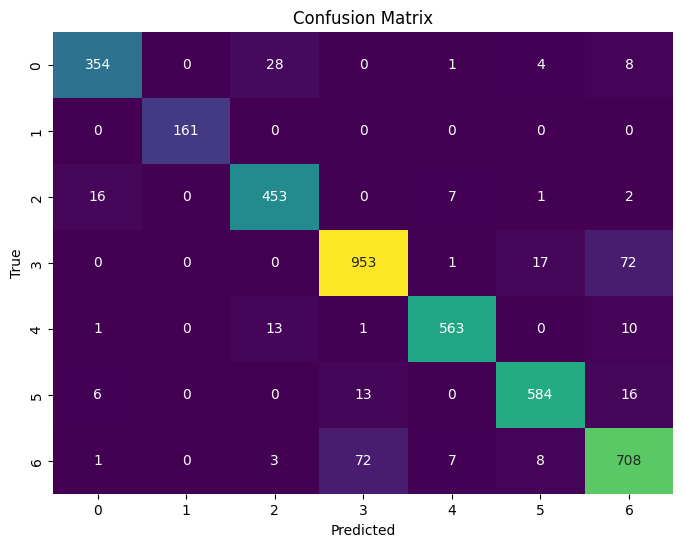

In [144]:
predictions_3 = model_3.predict(X_test)
accuracy_3 = accuracy_score(y_test, predictions_3)
print(f"Random Forest Accuracy: {accuracy_3:.4f}")
print("Random Forest Classification Report:\n", classification_report(y_test, predictions_3))
cm3 = confusion_matrix(y_test, predictions_3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt="d", cmap="viridis", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [146]:
model_4 = DecisionTreeClassifier(random_state=42)
model_4.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Decision Tree Accuracy: 0.9246
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       395
           1       1.00      1.00      1.00       161
           2       0.91      0.95      0.93       479
           3       0.92      0.91      0.92      1043
           4       0.97      0.96      0.96       588
           5       0.95      0.94      0.95       619
           6       0.87      0.89      0.88       799

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.94      4084
weighted avg       0.93      0.92      0.92      4084



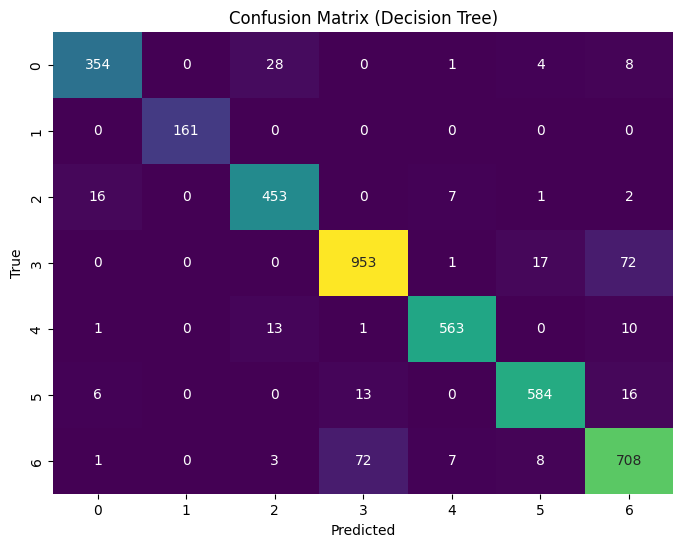

In [148]:
predictions_4 = model_3.predict(X_test)
accuracy_4 = accuracy_score(y_test, predictions_4)
print(f"Decision Tree Accuracy: {accuracy_4:.4f}")
print("Decision Tree Classification Report:\n", classification_report(y_test, predictions_4))
cm4 = confusion_matrix(y_test, predictions_4)
plt.figure(figsize=(8, 6))
sns.heatmap(cm4, annot=True, fmt="d", cmap="viridis", cbar=False)
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()